<center>
<font size=5px><b>
Challenge Set 5
</font>
</center>

| Topic:    | Classification        |
| :-------- | --------------------: |
| Student:  | Max Farago            |
| Date Due: | 08/01/2016            |

## Challenge 1

__Load the data into a pandas dataframe and replace 'y's with 1s, 'n's with 0s__

In [70]:
import pandas as pd
import numpy as np

In [84]:
vList = ["Vote_" + str(i) for i in range(1,17)]
df1 = pd.read_csv("house-votes-84.data", names = vList)
df1.replace(['y', 'n'], [1, 0], inplace=True)
df1.head()

,Vote_1,Vote_2,Vote_3,Vote_4,Vote_5,Vote_6,Vote_7,Vote_8,Vote_9,Vote_10,Vote_11,Vote_12,Vote_13,Vote_14,Vote_15,Vote_16
republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


__Convert each '?' to the mean of the column)__

In [86]:
for col in df1.columns.values:
    df1[col].replace('?', round( df1[df1[col] != '?'][col].mean(), 1 ), inplace=True)
df1.head()

,Vote_1,Vote_2,Vote_3,Vote_4,Vote_5,Vote_6,Vote_7,Vote_8,Vote_9,Vote_10,Vote_11,Vote_12,Vote_13,Vote_14,Vote_15,Vote_16
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.4,1.0,1.0,1.0,0.0,1.0
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.8
democrat,0.4,1.0,1.0,0.4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
democrat,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.4,1.0,1.0,1.0,1.0


## Challenge 2

__Split the data into a test and training set__

In [4]:
from sklearn.cross_validation import train_test_split

In [100]:
print df1.values

[[ 0.   1.   0.  ...,  1.   0.   1. ]
 [ 0.   1.   0.  ...,  1.   0.   0.8]
 [ 0.4  1.   1.  ...,  1.   0.   0. ]
 ..., 
 [ 0.   0.5  0.  ...,  1.   0.   1. ]
 [ 0.   0.   0.  ...,  1.   0.   1. ]
 [ 0.   1.   0.  ...,  1.   0.4  0. ]]


In [101]:
ydata = df1.index.values
xdata = df1.values
xTrain, xTest, yTrain, yTest = train_test_split(xdata, ydata, test_size=0.30, random_state=4444)

### Challenge 3

__Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat)__

In [102]:
from sklearn.neighbors import KNeighborsClassifier

__Try it with k values from 1 to 20.__

In [104]:
#modelList = ["k" + str(i) for i in range(1,21)]
modelDictKNN = { "k" + str(k) : KNeighborsClassifier(k).fit(xTrain, yTrain).predict(xTest) for k in range(1,21)}

__On the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k__

In [105]:
from sklearn.metrics import accuracy_score

In [107]:
accDict = { x: accuracy_score(yTest, modelDictKNN[x]) for x in modelDictKNN.keys()}

__Which k value gives the highest accuracy?__

In [123]:
print ("Highest accuracy is " + str(max(accDict.values()[::-1])) + 
       " from k value: " + max(accDict)[1:])

Highest accuracy is 0.931297709924 from k value: 9


In [170]:
kList = [ int(x[1:]) for x in accDict.keys() ]
x, y = zip(*sorted(zip(kList, accDict.values()), key=lambda x: x[0], reverse=True))
max(y)

0.93129770992366412

In [166]:
a = [(20, 0.91603053435114501), (19, 0.92366412213740456), (18, 0.91603053435114501)]
b = [(17, 0.92366412213740456), (16, 0.92366412213740456), (15, 0.92366412213740456)]
x,y = zip(*a)
print x

(20, 19, 18)


### Challenge 4

__Make a similar model with LogisticRegression and check accuracy__

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
modelLR = LogisticRegression()
accLR = accuracy_score(modelLR.fit(xTrain, yTrain).predict(xTest), yTest)
accLR

0.93893129770992367

### Challenge 5

__Make a bar graph of democrats and republicans.__

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

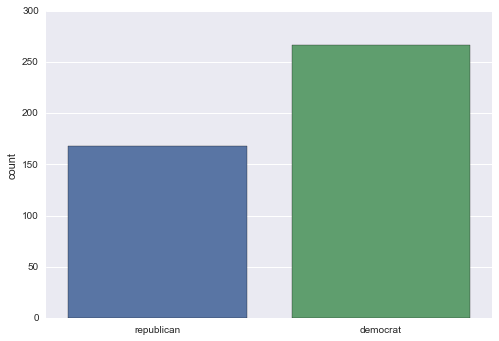

In [14]:
ax = sns.countplot(df.index, data=df)

__How many of each are there?__

In [15]:
numDems, numReps = len([x for x in df.index if x == "democrat"]), len([x for x in df.index if x == "republican"])
print "Democrats: " + str(numDems) + " / Republicans: " + str(numReps)

Democrats: 267 / Republicans: 168


__Make a very simple predictor that predicts 'democrat' for every incoming example.  Do the same with predicting 'republican' all the time__

In [16]:
def simpleDemPred(inputX):
    return ["democrat" for x in inputX]

def simpleRepPred(inputX):
    return ["republican" for x in inputX]

__Measure accuracy__

In [17]:
accSD = accuracy_score(df.index, simpleDemPred(df.index))
print accSD
accSR = accuracy_score(df.index, simpleRepPred(df.index))
print accSR

0.613793103448
0.386206896552


In [18]:
print float(numDems) / len(df.index)
print float(numReps) / len(df.index)

0.613793103448
0.386206896552


### Challenge 6

__Plot the accuracies as a function of k__

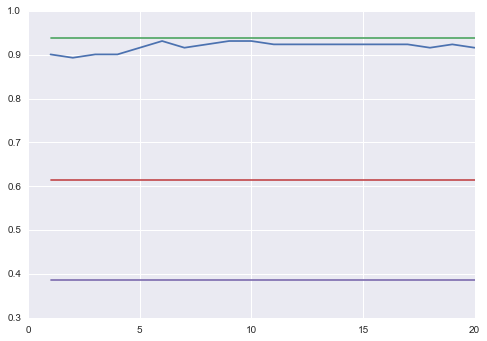

In [19]:
dfAcc = pd.DataFrame(columns=["KNN", "LR", "SD", "SR"])
for i in range(1, 21):
    dfAcc.loc[i] = [accDict["n"+str(i)], accLR, accSD, accSR]
    
plt.plot(dfAcc.index, dfAcc.KNN, '-')
plt.plot(dfAcc.index, dfAcc.LR, '-')
plt.plot(dfAcc.index, dfAcc.SD, '-')
plt.plot(dfAcc.index, dfAcc.SR, '-')

### Challenge 7

__Plot a learning curve for the logistic regression model and KNN model with best k value__

In [20]:
from sklearn.learning_curve import learning_curve

In [66]:
trainSizesLR, trainScoresLR, testScoresLR = (  # Learning Curve for Logistic Regression model
    learning_curve(estimator=modelLR, X=xdata, y=ydata, train_sizes=np.linspace(0.1, 1.0, 15)))
trainScoresLR_m = np.mean(trainScoresLR, axis=1)
testScoresLR_m = np.mean(testScoresLR, axis=1)

In [22]:
modelKNN = KNeighborsClassifier(10)
trainSizesKNN, trainScoresKNN, testScoresKNN = ( # Learning Curve for KNN model with best k value
    learning_curve(estimator=modelKNN, X=xdata, y=ydata, train_sizes=np.linspace(0.1, 1.0, 15)))
trainScoresKNN_m = np.mean(trainScoresKNN, axis=1)
testScoresKNN_m = np.mean(testScoresKNN, axis=1)

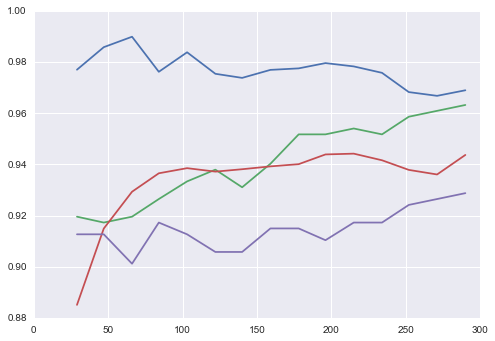

In [23]:
plt.plot(trainSizesLR, trainScoresLR_m, '-')
plt.plot(trainSizesLR, testScoresLR_m, '-')
plt.plot(trainSizesKNN, trainScoresKNN_m, '-')
plt.plot(trainSizesKNN, testScoresKNN_m, '-')

### Challenge 8

__Use different algorithms to classify your data and print the test accuracy of each__

*8a: Gaussian Naive Bayes*

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
modelGNB = GaussianNB()
accGNB = accuracy_score(modelGNB.fit(xTrain, yTrain).predict(xTest), yTest)
print accGNB

0.93893129771


*8b: SVM (Support Vector Machine) Classifier*

In [26]:
from sklearn.svm import SVC

In [27]:
modelSVM = SVC()
accSVM = accuracy_score(modelSVM.fit(xTrain, yTrain).predict(xTest), yTest)
print accSVM

0.954198473282


*8c: Decision Tree Classifier:*

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
modelDT = DecisionTreeClassifier()
accDT = accuracy_score(modelDT.fit(xTrain, yTrain).predict(xTest), yTest)
print accDT

0.946564885496


*8d: Random Forest Classifier*

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
modelRF = RandomForestClassifier()
accRF = accuracy_score(modelRF.fit(xTrain, yTrain).predict(xTest), yTest)
print accRF

0.93893129771


### Challenge 9
__Use *cross_val_train* function to calculate the cross validation score of each of the classifiers you tried before__

In [32]:
from sklearn.cross_validation import cross_val_score

In [33]:
classifierList = [modelKNN, modelLR, modelGNB, modelSVM, modelDT, modelRF]
meanList = zip(["KNN", "LR", "GNB", "SVM", "DT", "RT"] , [np.mean(cross_val_score(estimator=m, X=xdata, y=ydata)) for m in classifierList])
meanList

[('KNN', 0.92873563218390809),
 ('LR', 0.96321839080459759),
 ('GNB', 0.93103448275862066),
 ('SVM', 0.95402298850574718),
 ('DT', 0.9517241379310345),
 ('RT', 0.94942528735632192)]

### Challenge 10

__Predict the vote of a representative based on their other votes__

__Reload the data from scratch and convert y-->1, n-->0__

In [34]:
vList = ["Vote_" + str(i) for i in range(1,17)]
df2 = pd.read_csv("house-votes-84.data", names = vList)
df2.replace(['y', 'n'], [1, 0], inplace=True)
df2.head()

,Vote_1,Vote_2,Vote_3,Vote_4,Vote_5,Vote_6,Vote_7,Vote_8,Vote_9,Vote_10,Vote_11,Vote_12,Vote_13,Vote_14,Vote_15,Vote_16
republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


__Build a classifier that uses the congressperson's other votes (do not use the party as a feature) to predict if the vote will be 1 or 0__

In [35]:
xdata2 = [ df2.loc[y].values for y in df2.index.values]
modelLR2 = LogisticRegression()

__Convert each ? to the mode of the column__

In [4]:
for x in df2.columns.values:
    df2[x].replace('?', df2.mode()[x][0], inplace=True)
df2.head()

,Vote_1,Vote_2,Vote_3,Vote_4,Vote_5,Vote_6,Vote_7,Vote_8,Vote_9,Vote_10,Vote_11,Vote_12,Vote_13,Vote_14,Vote_15,Vote_16
republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


### Challenge 11

__Using movie data, choose a categorical feature and make a bar graph of how many of each movie there is for each feature__

In [76]:
df3 = pd.read_csv("../../../challenges_data/2013_movies.csv")
df3.groupby("Rating").count()

,Title,Budget,DomesticTotalGross,Director,Runtime,ReleaseDate
Rating,,,,,,
G,1,0,1,1,1,1
PG,15,15,15,14,15,15
PG-13,47,41,47,45,47,47
R,37,33,37,36,37,37


In [78]:
df3.dropna().groupby("Rating").count() # Loses 13 observations

,Title,Budget,DomesticTotalGross,Director,Runtime,ReleaseDate
Rating,,,,,,
PG,14,14,14,14,14,14
PG-13,40,40,40,40,40,40
R,33,33,33,33,33,33


__Replace missing numerical values with column means__

In [79]:
df3.Budget.replace(np.nan, df3.Budget.mean(), inplace=True)
df3.DomesticTotalGross.replace(np.nan, df3.Budget.mean(), inplace=True)
df3.Runtime.replace(np.nan, df3.Budget.mean(), inplace=True)

In [91]:
df3.dropna().groupby("Rating").count() # Loses only 4 observations (missing values for 'Director')

,Title,Budget,DomesticTotalGross,Director,Runtime,ReleaseDate
Rating,,,,,,
G,1,1,1,1,1,1
PG,14,14,14,14,14,14
PG-13,45,45,45,45,45,45
R,36,36,36,36,36,36


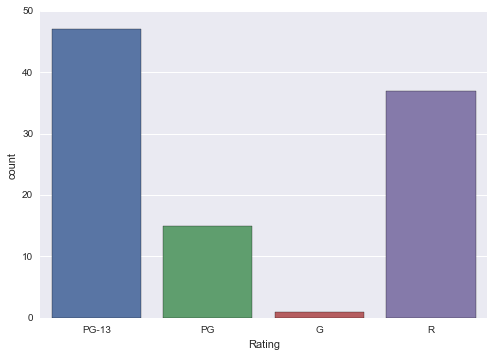

In [92]:
ax2 = sns.countplot("Rating", data=df3)

__Predict rating using KNN and logistic regression. Calculate their accuracies__

In [140]:
ydata2 = df3.Rating
xdata2 = np.array([ df3.drop(["Title", "Rating", "Director", "ReleaseDate"], axis=1).iloc[x] for x in range(len(ydata2)) ])
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(xdata2, ydata2, test_size=0.30, random_state=4444)

In [153]:
modelKNN3 = KNeighborsClassifier()
accuracy_score(yTest2, modelKNN3.fit(xTrain2, yTrain2).predict(xTest2))

0.56666666666666665

In [154]:
modelLR3 = LogisticRegression()
accuracy_score(yTest2, modelLR3.fit(xTrain2, yTrain2).predict(xTest2))

0.46666666666666667

__Make a baseline stupid predictor that always predicts the label that is present the most in the data, and calculate its accuracy on a test set__

In [155]:
def baselinePredictor(labelData):
    return [ labelData.value_counts().index[0] for x in labelData ]

accuracy_score(yTest2, baselinePredictor(yTest2))

0.46666666666666667

### Challenge 12

In [38]:
df4 = pd.read_csv("haberman.data", names = ["patientAge", "opYear", "numNodes", "survStat"])
df4.head()

,patientAge,opYear,numNodes,survStat
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


__12(a): What is the average and standard deviation of the age of all of the patients?__

In [39]:
meanAge, stdAge = df4.patientAge.mean(), df4.patientAge.std()
print meanAge, stdAge

52.4575163399 10.8034523493


__12(b): What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?__

In [40]:
meanAgeSurv, stdAgeSurv = df4[df4.survStat == 1].patientAge.mean(), df4[df4.survStat == 1].patientAge.std()
print meanAgeSurv, stdAgeSurv

52.0177777778 11.0121541799


__12(c): What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?__

In [41]:
meanAgeDied, stdAgeDied = df4[df4.survStat == 2].patientAge.mean(), df4[df4.survStat == 2].patientAge.std()
print meanAgeDied, stdAgeDied

53.6790123457 10.1671372083


__12(d): Plot a histogram of the ages side by side with a histogram of the number of axillary nodes__

(array([ 236.,   30.,   18.,    8.,    9.,    2.,    1.,    0.,    1.,    1.]),
 array([  0. ,   5.2,  10.4,  15.6,  20.8,  26. ,  31.2,  36.4,  41.6,
         46.8,  52. ]),
 <a list of 10 Patch objects>)

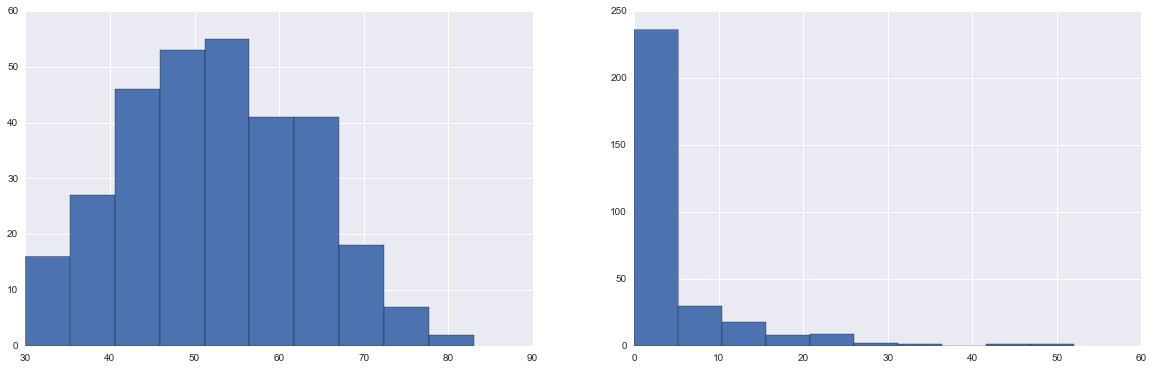

In [42]:
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.hist(df4.patientAge)
plt.subplot(122)
plt.hist(df4.numNodes)

__12(e): What is the earliest year of surgery in this dataset?__

In [43]:
print "Earliest year: 19" + str(min(df4.opYear))

Earliest year: 1958


__12(f): What is the most recent year of surgery?__

In [44]:
print "Most recent year: 19" + str(max(df4.opYear))

Most recent year: 1969


__12(g): Use logistic regression to predict survival after 5 years. How well does your model do?__

In [45]:
ydata3 = df4.survStat
xdata3 = np.array([ df4.drop("survStat", axis=1).iloc[x] for x in range(len(ydata3)) ])
xTrain3, xTest3, yTrain3, yTest3 = train_test_split(xdata3, ydata3, test_size=0.30, random_state=4444)

In [46]:
modelLR4 = LogisticRegression()
modelLR4.fit(xTrain3, yTrain3).predict(xTest3)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [68]:
accuracy_score(yTest3, modelLR4.fit(xTrain3, yTrain3).predict(xTest3))


0.81521739130434778

__12(h): What are the coefficients of logistic regression? Which features affect the outcome how?__

Uhh....

__12(i): Draw the learning curve for logistic regression in this case__

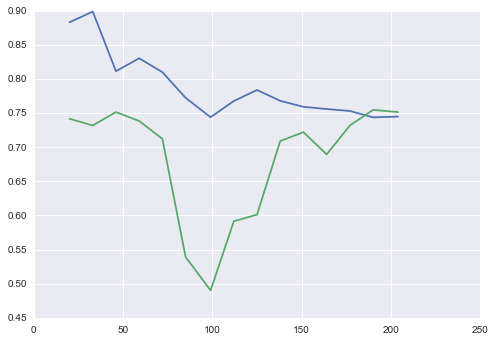

In [171]:
trainSizesLR3, trainScoresLR3, testScoresLR3 = (
    learning_curve(estimator=modelLR, X=xdata3, y=ydata3, train_sizes=np.linspace(0.1, 1.0, 15)))
trainScoresLR3_m = np.mean(trainScoresLR3, axis=1)
testScoresLR3_m = np.mean(testScoresLR3, axis=1)
plt.plot(trainSizesLR3, trainScoresLR3_m, '-')
plt.plot(trainSizesLR3, testScoresLR3_m, '-')